# 2.5 Google Colab - Algoritmos de mejoramiento de imágenes basado por pixeles
### Computer Vision for Images and Video (TC4033 - Group 10)

- **School**: School of Engineering and Sciences, Tecnológico de Monterrey
- **Lead Professor**: Dr. Gilberto Ochoa Ruiz
- **Assistant Professor**: MIP Ma. del Refugio Melendez Alfaro
- **Tutor Professor**: Iván Reyes Amezcua
- **Team 5**:
  - Benjamin Cisneros Barraza - A01796323
  - Jonatan Israel Meza Mendoza - A01275322
  - Carlos Pano Hernández - A01066264
  - Edgar Omar Cruz Mendoza - A01795590
- **Date**: Sunday, September 21th, 2025


## Importing Libraries <a class="anchor" id="libraries" ></a>

In [1]:
from matplotlib import image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import cv2

## Loading Images <a class="anchor" id="loading"></a>

In [2]:
# Load images
try:
    img1 = mpimg.imread('data/img1.jpg')
    img2 = mpimg.imread('data/img2.jpg')
    img3 = mpimg.imread('data/img3.jpg')
    print('Images loaded successfully!')
    print('Image 1 shape:', img1.shape)
    print('Image 2 shape:', img2.shape)
    print('Image 3 shape:', img3.shape)
except FileNotFoundError as e:
    print(f"Error loading images: {e}. Please ensure the 'data' folder is in the same directory as this notebook and contains the required images.")
    # Handle gracefully if images are not found
    img1, img2, img3 = None, None, None

Images loaded successfully!
Image 1 shape: (3464, 4618, 3)
Image 2 shape: (3024, 4032, 3)
Image 3 shape: (4032, 3024, 3)


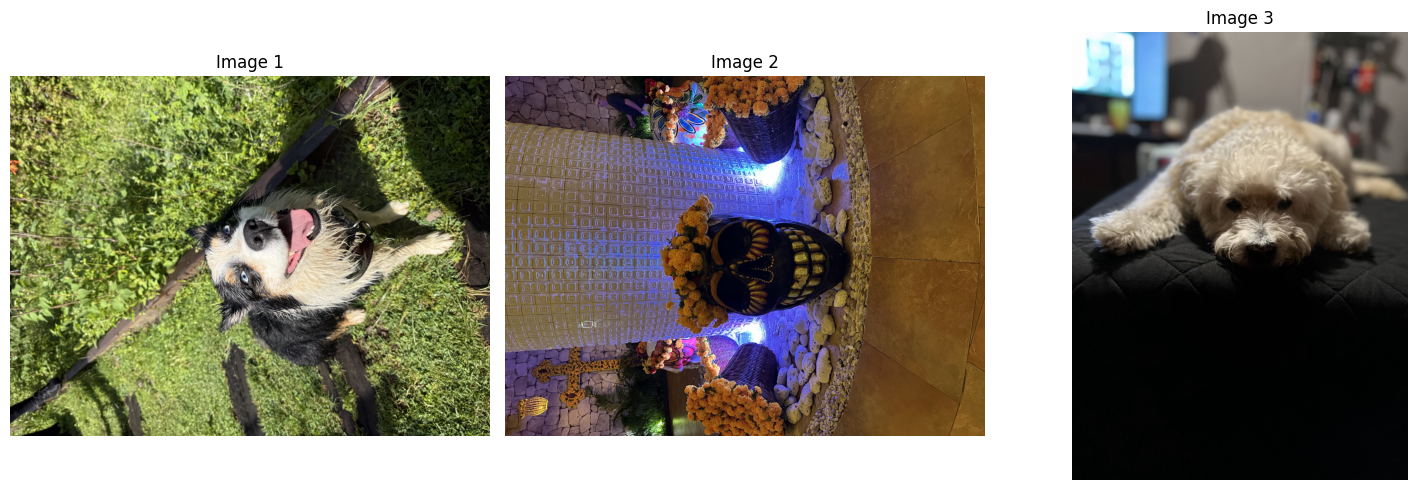

In [3]:
# Display the selected images
if img1 is not None and img2 is not None and img3 is not None:
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))

    axes[0].imshow(img1)
    axes[0].set_title('Image 1')
    axes[0].axis('off')

    axes[1].imshow(img2)
    axes[1].set_title('Image 2')
    axes[1].axis('off')

    axes[2].imshow(img3)
    axes[2].set_title('Image 3')
    axes[2].axis('off')

    plt.tight_layout()
    plt.show()

### Exercise 1
Research and implement the tile-based histogram equalization method. 

In these methods, the image is partitioned into different windows (i.e., tiles), and histograms are calculated independently for each window, applying the correction to each tile. There is a trade-off between the window size and computational complexity, making this method more complex than the simple approach. 

Implement this version and perform some tests by varying the window size. Another drawback is that you may observe noticeable differences in contrast between the blocks; how could this be improved?

# -------------------------------

## Tile-Based Histogram Equalization (CLAHE)

**Tile-based histogram equalization**, specifically the **Contrast-Limited Adaptive Histogram Equalization (CLAHE)** method, is a technique to improve contrast in images. Unlike global histogram equalization, which calculates a single histogram for the entire image, CLAHE divides the image into smaller, non-overlapping regions called **tiles**. 

The CLAHE method addresses the limitations of simple adaptive histogram equalization (AHE) by preventing the amplification of noise and ensuring smooth transitions between tiles. This method works by:

- **Tiling:** The input image is divided into a grid of rectangular tiles. The size of these tiles is a crucial parameter. A larger tile size results in a more uniform equalization, similar to the global method, while a smaller size provides more localized contrast enhancement.

- **Local Equalization:** A histogram is computed for each tile. A key step in CLAHE is to **clip** this histogram at a predefined limit. This prevents any single intensity value from having a disproportionately high frequency, which would cause over-enhancement and noise amplification. After clipping, the histogram is normalized, and a separate mapping function is generated for each tile.

- **Interpolation:** To eliminate the artificial boundaries that can appear between tiles due to independent processing, CLAHE uses **bilinear interpolation**. This process smooths the transition between adjacent tiles by blending the equalization results from the surrounding tiles, creating a seamless and natural-looking final image. 

This approach is particularly effective for images where the contrast varies significantly across different regions, revealing details in both bright and dark areas simultaneously.

### Implementation and Parameter Testing

In [4]:
# Creating our CLAHE function. Receives an image, a clip limit and a tile grid size.
def apply_clahe(image, clip_limit=2.0, tile_grid_size=(8, 8)):
    """
    Applies Contrast-Limited Adaptive Histogram Equalization (CLAHE).

    Parameters:
    - image: The input grayscale image.
    - clip_limit: The contrast clipping threshold. A higher value means more contrast.
    - tile_grid_size: The size of the tile grid (width, height).

    Returns:
    - The processed image.
    """
    # Create a CLAHE object
    clahe = cv2.createCLAHE(clipLimit=clip_limit, tileGridSize=tile_grid_size)

    # Apply CLAHE to the image
    processed_image = clahe.apply(image)

    return processed_image


Processing Image 1...


C:\Users\jonat\AppData\Local\Temp\ipykernel_37960\3437559743.py:62: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


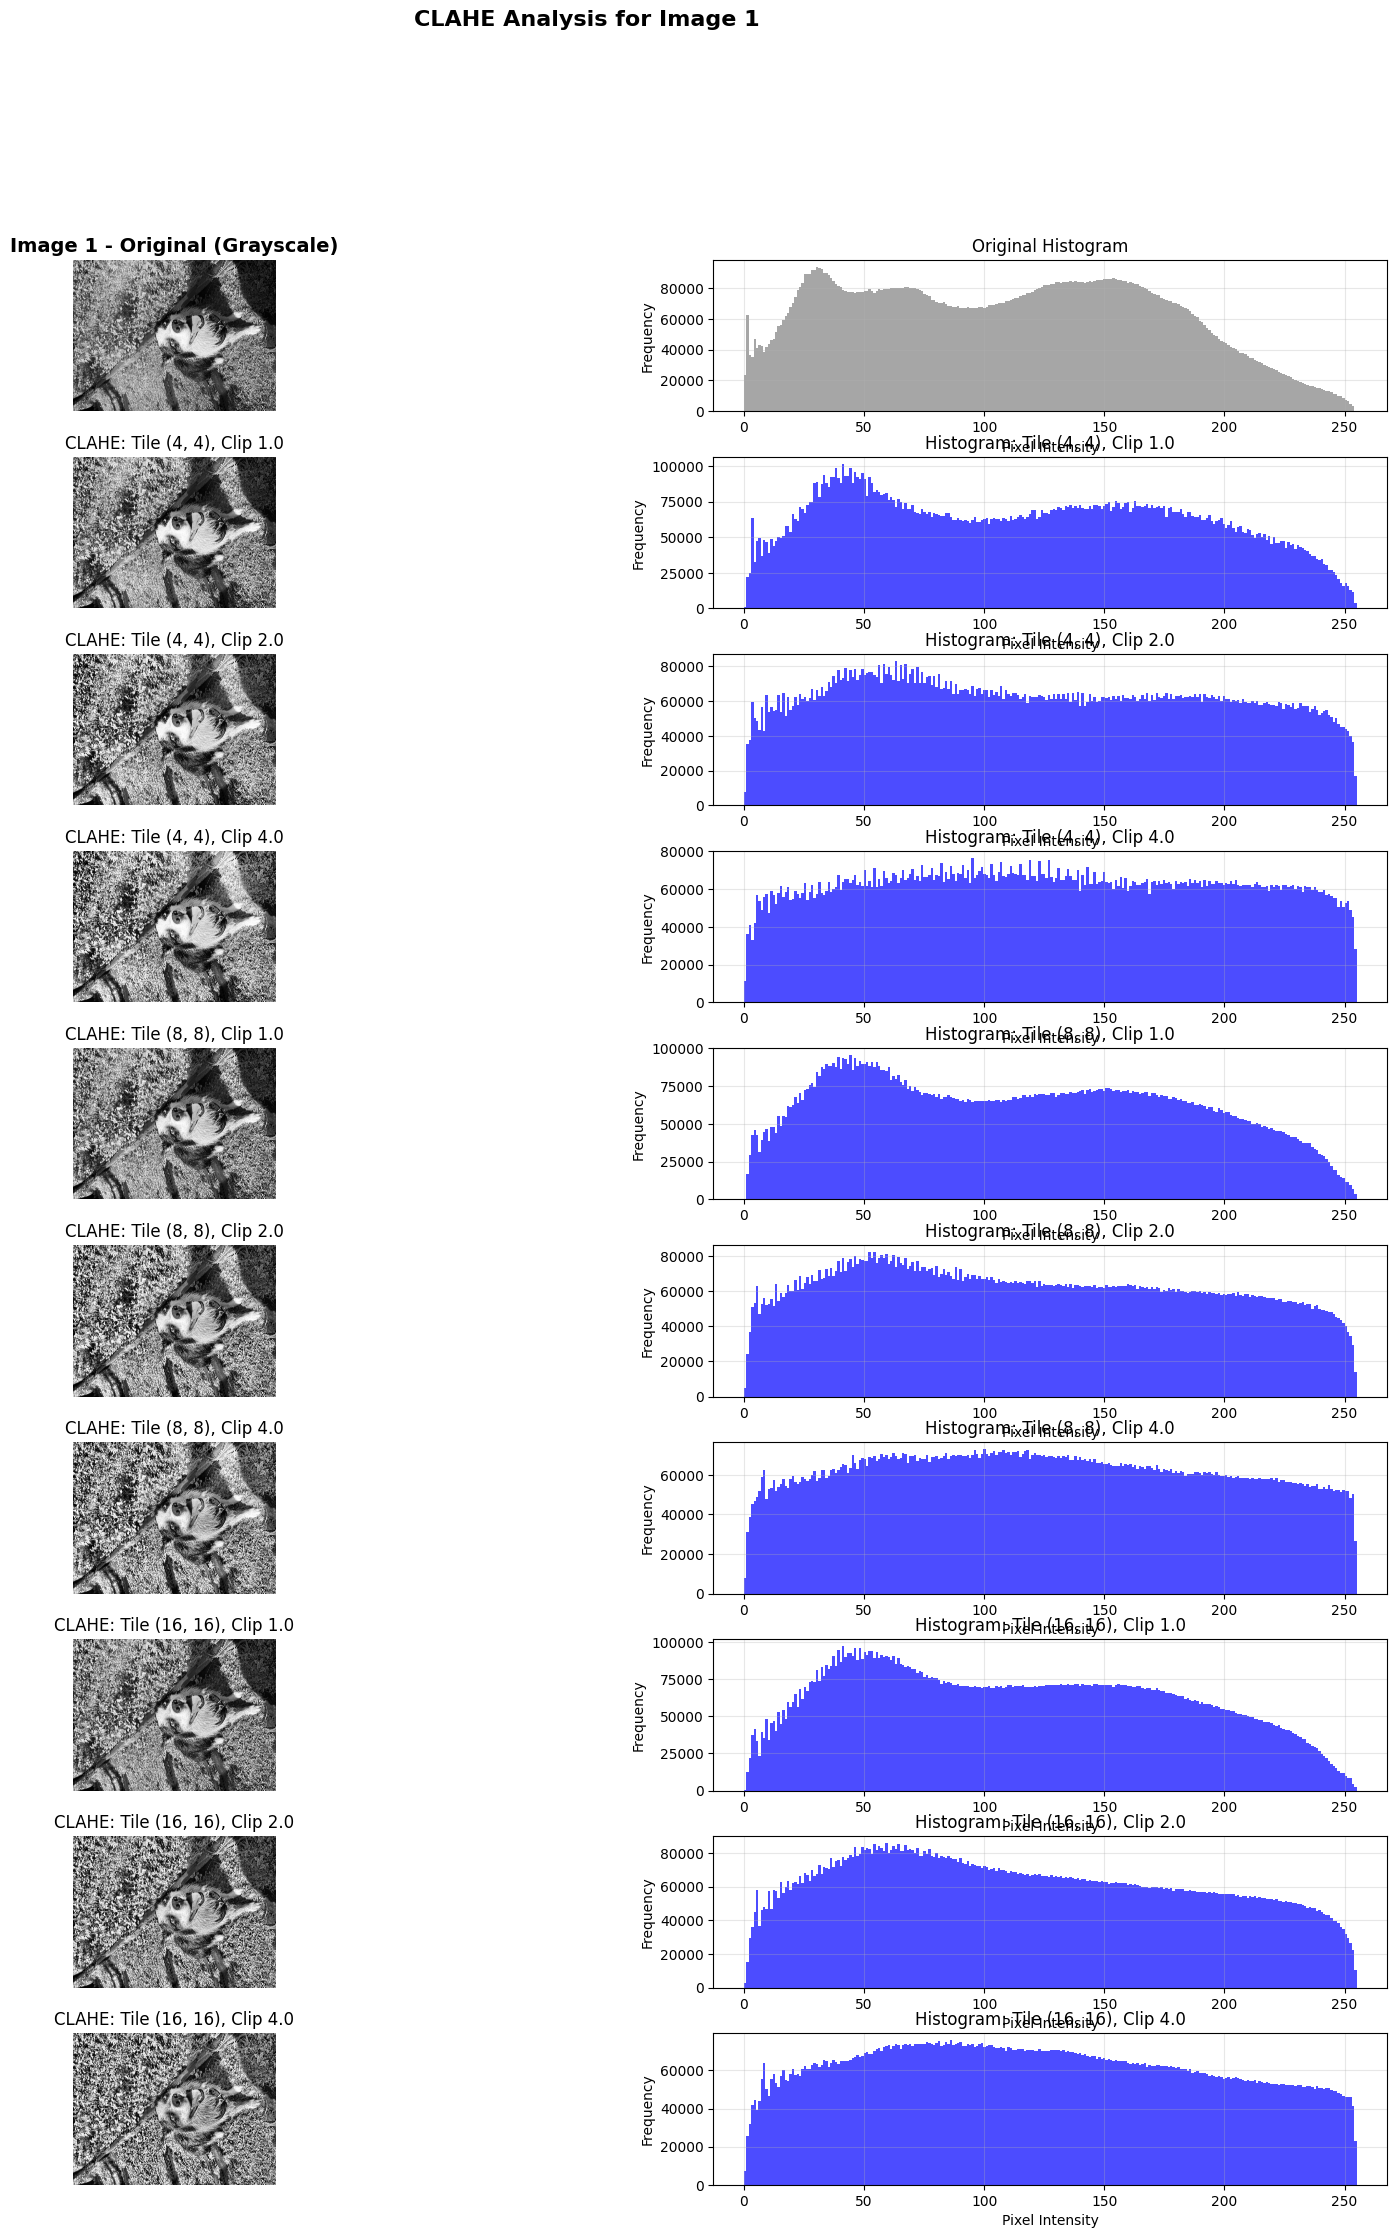


Image 1 - Statistical Analysis:
Original - Mean: 110.41, Std: 62.25
Best CLAHE - Tile: (4, 4), Clip: 2.0
Best CLAHE - Mean: 123.45, Std: 71.19
Contrast Improvement: 14.4%

Processing Image 2...


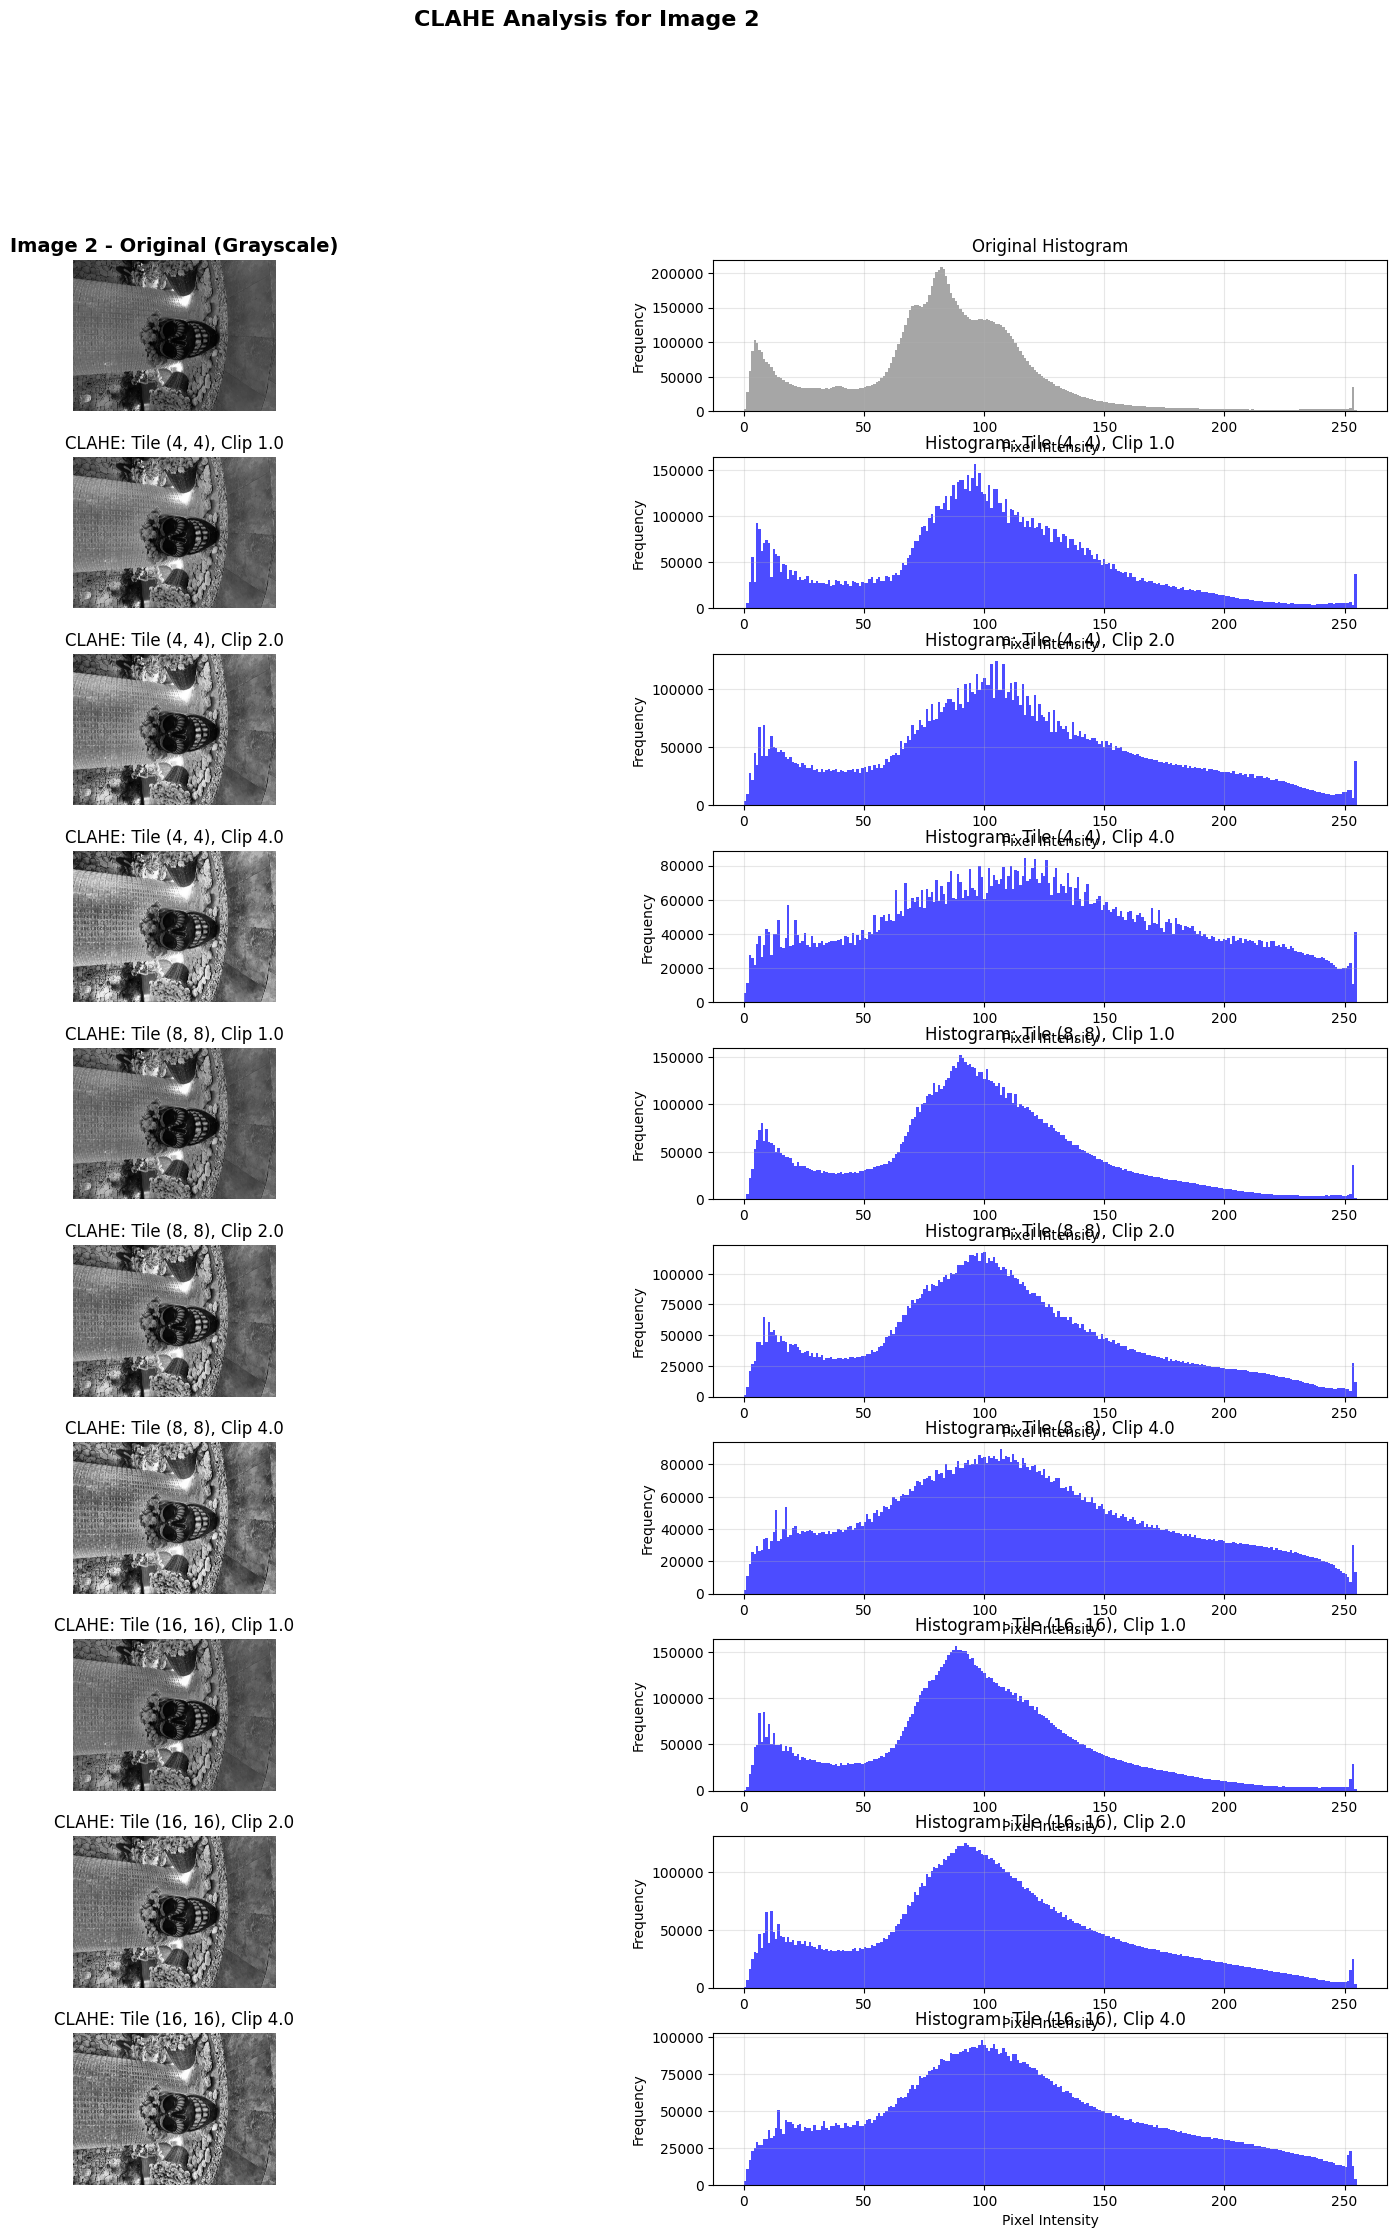


Image 2 - Statistical Analysis:
Original - Mean: 82.35, Std: 41.08
Best CLAHE - Tile: (4, 4), Clip: 4.0
Best CLAHE - Mean: 121.63, Std: 63.24
Contrast Improvement: 53.9%

Processing Image 3...


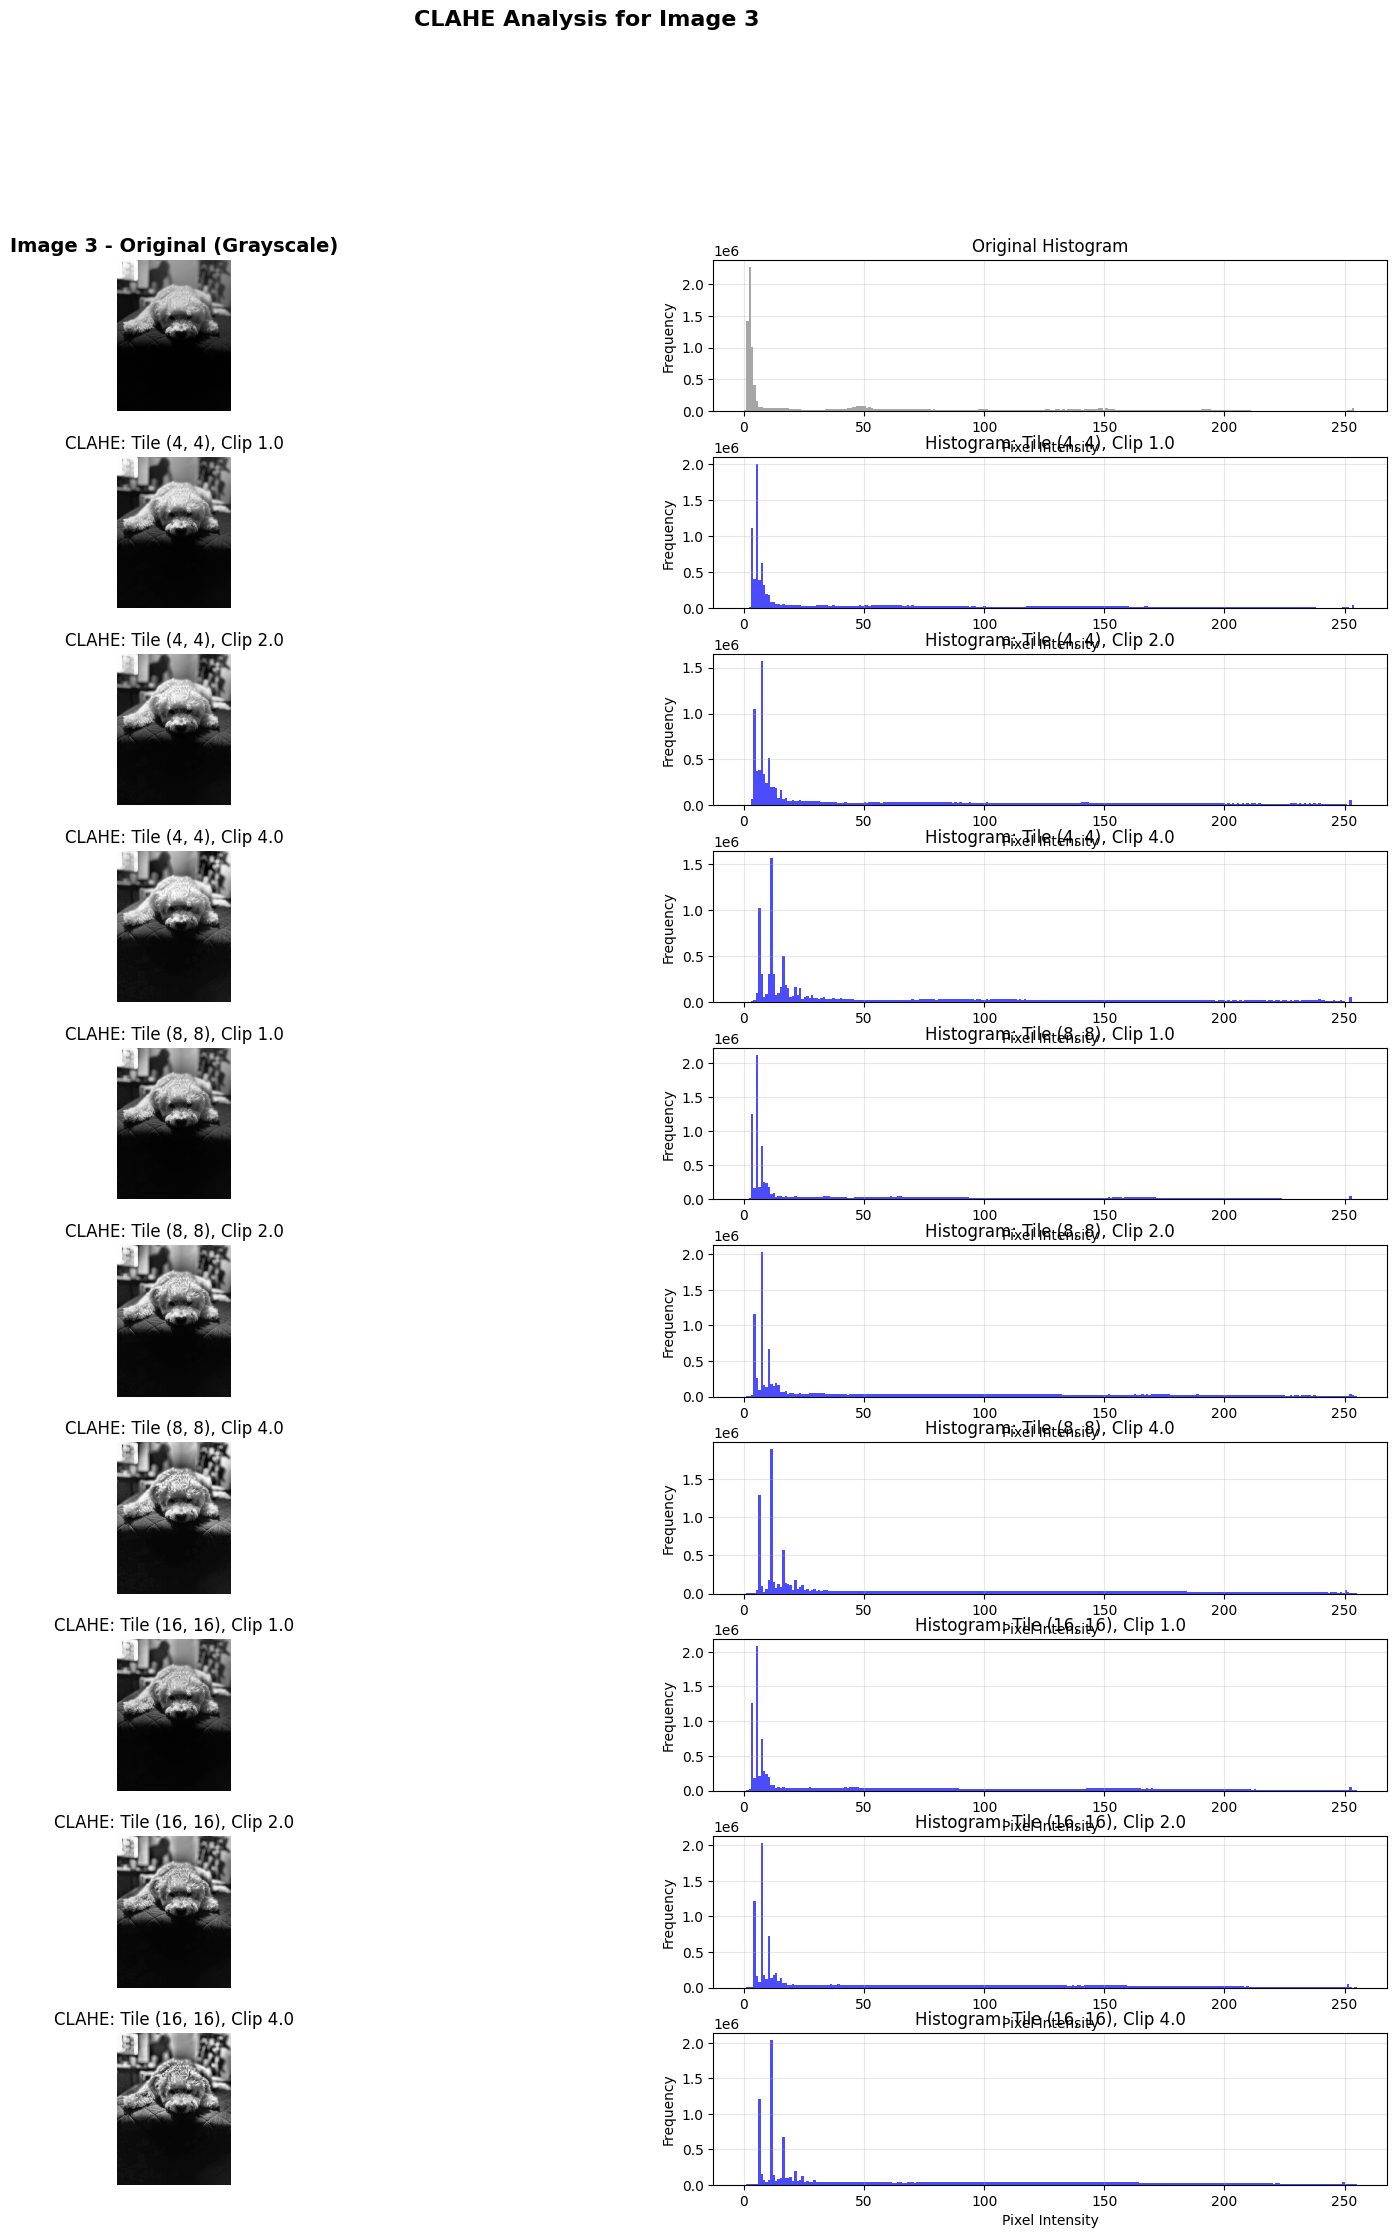


Image 3 - Statistical Analysis:
Original - Mean: 58.41, Std: 69.66
Best CLAHE - Tile: (4, 4), Clip: 4.0
Best CLAHE - Mean: 73.67, Std: 75.22
Contrast Improvement: 8.0%


In [5]:
if img1 is not None and img2 is not None and img3 is not None:
    try:
        # Convert images to grayscale for CLAHE processing
        img1_gray = cv2.cvtColor(img1, cv2.COLOR_RGB2GRAY)
        img2_gray = cv2.cvtColor(img2, cv2.COLOR_RGB2GRAY)
        img3_gray = cv2.cvtColor(img3, cv2.COLOR_RGB2GRAY)
        
        # Vary the window size and contrast limits for testing
        sizes = [(4, 4), (8, 8), (16, 16)]
        clip_limits = [1.0, 2.0, 4.0]
        
        images = [img1_gray, img2_gray, img3_gray]
        image_names = ['Image 1', 'Image 2', 'Image 3']
        
        for img_idx, (img_gray, img_name) in enumerate(zip(images, image_names)):
            print(f"\nProcessing {img_name}...")
            
            # Create a comprehensive figure with images and histograms
            fig = plt.figure(figsize=(20, 25))
            
            # Create grid layout: 2 columns (image + histogram) for each row
            gs = fig.add_gridspec(len(sizes) * len(clip_limits) + 1, 2, hspace=0.3, wspace=0.3)
            
            # Original image and histogram
            ax_img = fig.add_subplot(gs[0, 0])
            ax_hist = fig.add_subplot(gs[0, 1])
            
            ax_img.imshow(img_gray, cmap='gray')
            ax_img.set_title(f"{img_name} - Original (Grayscale)", fontsize=14, fontweight='bold')
            ax_img.axis('off')
            
            # Original histogram
            ax_hist.hist(img_gray.ravel(), bins=256, range=(0, 255), color='gray', alpha=0.7)
            ax_hist.set_title(f"Original Histogram", fontsize=12)
            ax_hist.set_xlabel('Pixel Intensity')
            ax_hist.set_ylabel('Frequency')
            ax_hist.grid(True, alpha=0.3)
            
            plot_index = 1
            
            for size in sizes:
                for clip in clip_limits:
                    processed_image = apply_clahe(img_gray, clip_limit=clip, tile_grid_size=size)
                    
                    # Image subplot
                    ax_img = fig.add_subplot(gs[plot_index, 0])
                    ax_img.imshow(processed_image, cmap='gray')
                    ax_img.set_title(f"CLAHE: Tile {size}, Clip {clip}", fontsize=12)
                    ax_img.axis('off')
                    
                    # Histogram subplot
                    ax_hist = fig.add_subplot(gs[plot_index, 1])
                    ax_hist.hist(processed_image.ravel(), bins=256, range=(0, 255), color='blue', alpha=0.7)
                    ax_hist.set_title(f"Histogram: Tile {size}, Clip {clip}", fontsize=12)
                    ax_hist.set_xlabel('Pixel Intensity')
                    ax_hist.set_ylabel('Frequency')
                    ax_hist.grid(True, alpha=0.3)
                    
                    plot_index += 1
            
            plt.suptitle(f"CLAHE Analysis for {img_name}", fontsize=16, fontweight='bold', y=0.98)
            plt.tight_layout()
            plt.show()
            
            # Statistical analysis
            print(f"\n{img_name} - Statistical Analysis:")
            print(f"Original - Mean: {img_gray.mean():.2f}, Std: {img_gray.std():.2f}")
            
            # Test different parameters and show best results
            best_contrast = 0
            best_params = None
            best_image = None
            
            for size in sizes:
                for clip in clip_limits:
                    test_img = apply_clahe(img_gray, clip_limit=clip, tile_grid_size=size)
                    contrast = test_img.std()  # Standard deviation as contrast measure
                    if contrast > best_contrast:
                        best_contrast = contrast
                        best_params = (size, clip)
                        best_image = test_img
            
            print(f"Best CLAHE - Tile: {best_params[0]}, Clip: {best_params[1]}")
            print(f"Best CLAHE - Mean: {best_image.mean():.2f}, Std: {best_image.std():.2f}")
            print(f"Contrast Improvement: {((best_contrast - img_gray.std()) / img_gray.std() * 100):.1f}%")

    except Exception as e:
        print(f"An unexpected error occurred: {e}")

## How to Improve the Contrast Between Blocks

The primary drawback of a simple tile-based histogram equalization (AHE) is the potential for **noticeable differences in contrast between blocks**, resulting in a grid-like artifact. The implementation we used, **CLAHE**, already incorporates the key improvements to solve this issue:

1.  **Contrast Limiting**: By using a `clip_limit`, CLAHE prevents any single histogram bin from having an extremely high count. This stops the algorithm from aggressively amplifying contrast in uniform regions (like a clear sky), which would otherwise lead to noise amplification and sharp contrast differences between tiles.

2.  **Bilinear Interpolation**: This is the most critical feature. Instead of simply applying the equalization function for each tile and then putting the image back together, CLAHE calculates the final pixel value by **interpolating** the results from the four surrounding tiles. This creates a smooth, continuous transition across tile boundaries, effectively eliminating the grid artifacts. 


## CLAHE Best Practices and Usage Guidelines

### When to Use CLAHE:
1. **Low-contrast images**: When global histogram equalization fails to reveal details in both bright and dark areas simultaneously.
2. **Medical imaging**: Enhances X-rays, CT scans, and MRI images where local contrast is crucial for diagnosis.
3. **Satellite imagery**: Improves contrast in aerial photos with varying lighting conditions.
4. **Photography**: Can be used to create an HDR-like effect, bringing out details in shadows and highlights from a single exposure.
5. **Computer vision preprocessing**: An excellent preprocessing step to enhance images before applying feature detection, object recognition, or segmentation algorithms.

### Parameter Selection Guide:

#### Clip Limit (Contrast Limiting):
- **1.0-2.0**: **Conservative**, preserves a more natural look while providing a subtle enhancement.
- **2.0-3.0**: A **balanced** enhancement, often the recommended starting point.
- **3.0-4.0**: **Aggressive** enhancement; may introduce artifacts but can be useful for very low-contrast images.
- **>4.0**: Usually too aggressive, with a high risk of amplifying noise and creating unnatural results.

#### Tile Grid Size:
- **(4,4)**: Provides **very local adaptation** and is good for revealing fine details, but may create more visible artifacts if the clip limit is high.
- **(8,8)**: Offers a **good balance** between local and global adaptation and is the recommended starting point.
- **(16,16)**: Provides a **smoother** result with more global adaptation, similar to regular histogram equalization but with more local control.
- **(32,32)**: Very global; the effect will be very similar to regular histogram equalization, losing the benefits of a tiled approach.

### Best Practices:
1. **Start with (8,8) tiles and a clip limit of 2.0.**
2. **Adjust the clip limit first, then the tile size**, to find the optimal balance between contrast enhancement and noise.
3. **Be mindful of over-enhancement artifacts**, which can make the image look artificial or "grainy."
4. **Use statistical measures** like standard deviation to objectively quantify the contrast improvement.


### Exercise 2
Research and implement a simple method for Sliding Window Adaptive Histogram Equalization (SWAHE), and compare its results on several images of different types.

# -------------------------------

### Exercise 3
Research how the CLAHE algorithm (Contrast Limited Adaptive Histogram Equalization) works and implement it (you may use the OpenCV implementation). Test it on different types of images and compare the results with the basic histogram equalization method. Provide a brief description of the method based on your literature review.

# -------------------------------

## Bibliography

- **Zuiderveld, K. (1994). Contrast-limited adaptive histogram equalization. In *Graphics Gems IV* (pp. 474–485). Academic Press.**
- **OpenCV Documentation.**
- **Digital Image Processing, 4th Edition, by Rafael C. Gonzalez and Richard E. Woods.**
